In [4]:
import sys 
sys.path.append('/home/pierre-edouard/Desktop/ICL/Git_LHCb')

import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy import interpolate
import time 
from tqdm import tqdm
import csv 
import seaborn as sns


import b_meson_fit as bmf 
from toy_minuit import toy
from test_iminuit import amplitude_latex_names ,amplitude_names, LaTex_labels , Standard_labels  , fix_array , fix_alphas , fix_one_alpha , fix_alpha_beta  ,fix_alpha_beta_gamma5


In [5]:
def get_arrays(data , N):
    '''
        Inputs : data (2d array format) , N (number of migrad fits)
        
        Splits the csv data in two arrays for amplitudes and associated errors, both of dimension (N , 48) 
    '''
    raw_data=data[0:N,:]
    coefs , errors = np.zeros((N , 48)) , np.zeros((N , 48))
    for i in range(0,96,2):
        coefs[: , int(i/2)]= raw_data[: , i]
        errors[: , int(i/2)]= raw_data[: , i+1]
    return coefs , errors


In [6]:
#first we need to generate some data ...

N_events=2400

toy_signalSM=toy('SM')
toy_signalNP=toy('NP')

toy_signalSM.generate(events=N_events , verbose=True)
toy_signalNP.generate(events=N_events , verbose=True)


Ideal coeffs for  SM  :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 5.306524753570557
Ideal coeffs for  NP  :  [-3.4277496, -0.12410027, 6.045281, 0.009340614, -0.0019891937, 0.50341135, -0.25086978, -0.005180213, 8.636745, 0.22209263, -0.017419353, -0.5280673, 3.0646408, 0.078515366, -8.841145, -0.113660336, 0.00929356, -0.047615465, -0.933267, 0.016867112, -6.3185554, 0.0, 0.0, 0.0, 5.882883, -0.18442497, 8.101398, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 4.437376976013184


In [7]:
X=[]
print(fix_array)
fix_array=[0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           1, 1, 1,
           0, 0, 0,
           1, 1, 1,
           1, 1, 1,
           1, 1, 1,
           0, 1, 1, 
           0, 1, 1, 
           0, 1, 1, 
           0, 1, 1]

#fix_array=fix_alphas
print(fix_array)

for j in tqdm(range(10)):
    optimizeTF , coeffff = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=fix_array , verbose=False)
    X.append(coeffff)
    print('ID : ',toy_signalSM.coeffs)
    print('FIT :', coeffff)
X=np.asarray(X)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]


 10%|█         | 1/10 [00:15<02:19, 15.54s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.3591638, -0.16897711, 6.783159, 0.025098652, -0.024566086, 1.2116417, -0.4382518, -0.19037221, 10.742994, -3.9071407, 0.41753843, 5.4996886, 2.3805704, 0.3932429, -6.514327, -2.1437194, 0.40173137, 1.3719078, -0.09486673, -0.10137505, -8.624868, 0.0, 0.0, 0.0, 7.560445, -0.14025648, 13.528657, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1183836, 0.0, 0.0, 0.4814566, 0.0, 0.0, 2.125065, 0.0, 0.0, 0.9355583, 0.0, 0.0]


 20%|██        | 2/10 [00:22<01:43, 12.91s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.7077875, -0.18263729, 7.3276577, 0.026162622, -0.026368635, 1.3100998, -0.40804607, -0.21456876, 11.5281, -4.2452464, 0.4534219, 5.9722886, 2.5854478, 0.42298406, -7.053385, -2.3165293, 0.43384126, 1.4831218, -0.04994729, -0.1165562, -9.380013, 0.0, 0.0, 0.0, 8.167105, -0.1513953, 14.617623, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2084231, 0.0, 0.0, 0.517128, 0.0, 0.0, 2.2976522, 0.0, 0.0, 1.0085622, 0.0, 0.0]


 30%|███       | 3/10 [00:31<01:23, 11.94s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.469062, -0.2111395, 8.509608, 0.032158222, -0.03089844, 1.5180148, -0.55806845, -0.2373965, 13.4739065, -4.8680744, 0.519967, 6.858133, 2.9819427, 0.49306843, -8.162535, -2.6838071, 0.5032293, 1.7166027, -0.13281098, -0.12522231, -10.793989, 0.0, 0.0, 0.0, 9.4746475, -0.17567044, 16.956734, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4016688, 0.0, 0.0, 0.6050436, 0.0, 0.0, 2.6626372, 0.0, 0.0, 1.1743325, 0.0, 0.0]


 40%|████      | 4/10 [00:38<01:01, 10.21s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.80799, -0.1864137, 7.4835863, 0.026783375, -0.02693857, 1.3377241, -0.418835, -0.21882737, 11.774311, -4.3305273, 0.46251136, 6.093157, 2.6392066, 0.432026, -7.2012253, -2.3651872, 0.4429944, 1.5142055, -0.054516412, -0.118565604, -9.573916, 0.0, 0.0, 0.0, 8.33952, -0.15457912, 14.926608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2339576, 0.0, 0.0, 0.5283979, 0.0, 0.0, 2.3460352, 0.0, 0.0, 1.0301793, 0.0, 0.0]


 50%|█████     | 5/10 [00:44<00:45,  9.01s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.60888, -0.21749873, 8.728547, 0.03220129, -0.031596616, 1.5593942, -0.55258155, -0.2465521, 13.809568, -5.02508, 0.5370407, 7.0750127, 3.0666454, 0.5055571, -8.386725, -2.7589896, 0.51706535, 1.7662405, -0.12435892, -0.130153, -11.094862, 0.0, 0.0, 0.0, 9.7270775, -0.1802921, 17.410751, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4391301, 0.0, 0.0, 0.6199969, 0.0, 0.0, 2.7344575, 0.0, 0.0, 1.2040718, 0.0, 0.0]


 60%|██████    | 6/10 [00:50<00:33,  8.27s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.249495, -0.2045468, 8.169144, 0.03056755, -0.02968137, 1.4606142, -0.538265, -0.22823018, 12.963653, -4.705493, 0.50309724, 6.6257353, 2.8720686, 0.47389552, -7.857623, -2.5856464, 0.48463446, 1.6552174, -0.13844007, -0.11901716, -10.368837, 0.0, 0.0, 0.0, 9.113945, -0.16894677, 16.313007, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3483582, 0.0, 0.0, 0.582073, 0.0, 0.0, 2.5614748, 0.0, 0.0, 1.1285968, 0.0, 0.0]


 70%|███████   | 7/10 [00:58<00:24,  8.08s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.356877, -0.16886991, 6.7812715, 0.024257049, -0.024406634, 1.2121056, -0.3828453, -0.19783425, 10.673015, -3.9242246, 0.41912723, 5.5211825, 2.3904045, 0.39159444, -6.5238304, -2.143118, 0.40139815, 1.3719751, -0.05044718, -0.107295975, -8.673684, 0.0, 0.0, 0.0, 7.5566807, -0.14008984, 13.524781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1180838, 0.0, 0.0, 0.47876868, 0.0, 0.0, 2.1257453, 0.0, 0.0, 0.9334272, 0.0, 0.0]


 80%|████████  | 8/10 [01:04<00:14,  7.32s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-6.3313184, -0.2470621, 9.854199, 0.037264913, -0.035816334, 1.761991, -0.5504532, -0.28895134, 15.527773, -5.7022343, 0.60887915, 8.025081, 3.4934552, 0.5682178, -9.516188, -3.116208, 0.58388215, 1.9928905, -0.07537248, -0.15598011, -12.622222, 0.0, 0.0, 0.0, 10.99898, -0.20385525, 19.686905, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.627479, 0.0, 0.0, 0.6975877, 0.0, 0.0, 3.0939038, 0.0, 0.0, 1.3589262, 0.0, 0.0]


 90%|█████████ | 9/10 [01:10<00:07,  7.03s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-6.950222, -0.2747063, 10.81821, 0.04055362, -0.039400537, 1.940609, -0.6391818, -0.3135591, 17.137154, -6.302025, 0.67347205, 8.86481, 3.8439045, 0.62615067, -10.47668, -3.4367874, 0.64365417, 2.199925, -0.110304736, -0.16793942, -13.865724, 0.0, 0.0, 0.0, 12.112027, -0.22458118, 21.676699, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7919537, 0.0, 0.0, 0.76827776, 0.0, 0.0, 3.4066668, 0.0, 0.0, 1.4953434, 0.0, 0.0]


100%|██████████| 10/10 [01:18<00:00,  7.32s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.7225943, -0.14330015, 5.7922835, 0.022247052, -0.021050869, 1.0321949, -0.35886738, -0.16437241, 9.141264, -3.3006804, 0.35220018, 4.651907, 2.0325325, 0.3348231, -5.557042, -1.8225571, 0.34186214, 1.1644276, -0.07508895, -0.08730969, -7.3603077, 0.0, 0.0, 0.0, 6.4449816, -0.119492, 11.534722, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.95353043, 0.0, 0.0, 0.41123378, 0.0, 0.0, 1.8114916, 0.0, 0.0, 0.79902685, 0.0, 0.0]


Order : 0
Re($A_{\parallel}^L$)
[-4.1781025  -0.15184344  6.8183246 ]
[-5.1563387  -0.20051515  8.024767  ]


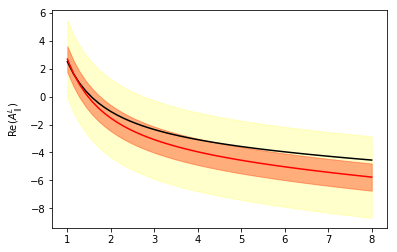

Order : 1
Im($A_{\parallel}^L$)
[ 0.00858538 -0.001823    0.4660742 ]
[ 2.5372548 -0.4754293 -1.6236513]


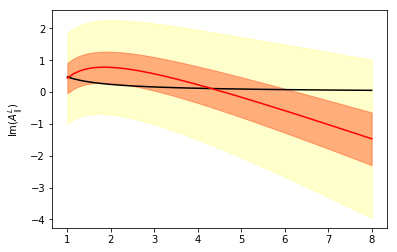

Order : 2
Re($A_{\parallel}^R$)
[-2.3538125e-01 -4.3176315e-03  8.0037451e+00]
[-0.4845395  -0.23006642 12.677174  ]


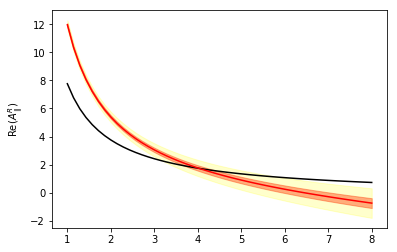

Order : 3
Im($A_{\parallel}^R$)
[ 0.16564202 -0.01309588 -0.30668017]
[-0.02972944  0.02907241 -1.434439  ]


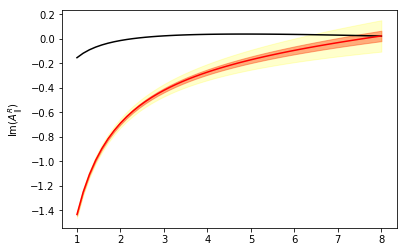

Order : 4
Re($A_{\bot}^L$)
[ 3.8864067   0.08526551 -8.197446  ]
[ 2.8286176  0.464156  -7.7249565]


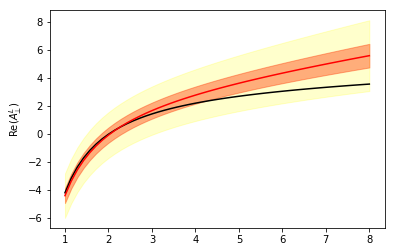

Order : 5
Im($A_{\bot}^L$)
[-0.09505176  0.00793401 -0.07297003]
[ 4.631073   -0.49472553 -6.5186996 ]


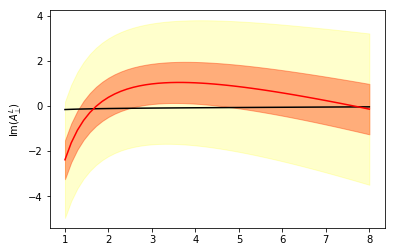

Order : 6
Re($A_{\bot}^R$)
[-0.4235836   0.02729899 -7.147451  ]
[ -0.09061537  -0.12294146 -10.235842  ]


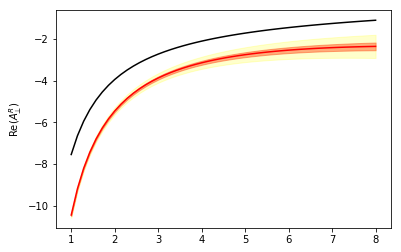

Order : 7
Im($A_{\bot}^R$)
[0. 0. 0.]
[0. 0. 0.]


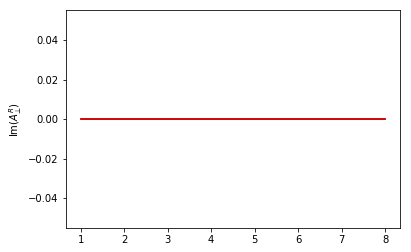

Order : 8
Re($A_{0}^L$)
[ 7.202759  -0.2278163  9.89863  ]
[ 8.949541   -0.16591585 16.01765   ]


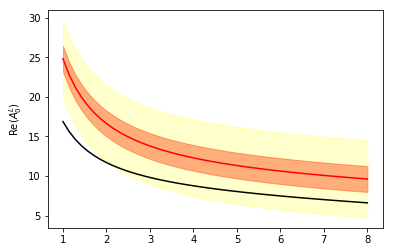

Order : 9
Im($A_{0}^L$)
[0. 0. 0.]
[0. 0. 0.]


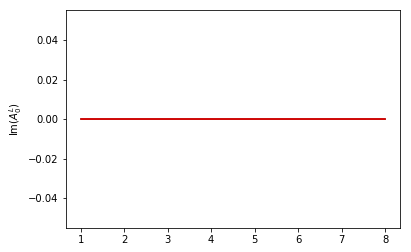

Order : 10
Re($A_{0}^R$)
[0. 0. 0.]
[0. 0. 0.]


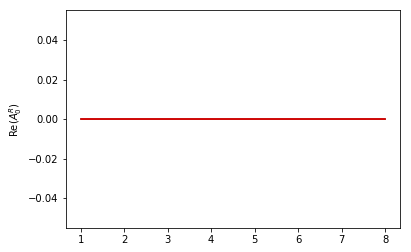

Order : 11
Im($A_{0}^R$)
[0. 0. 0.]
[0. 0. 0.]


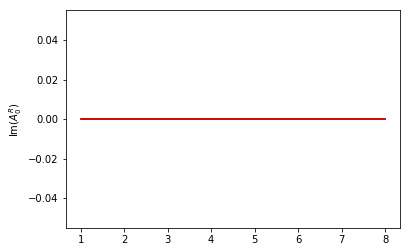

Order : 12
Re($A_{00}^L$)
[1. 0. 0.]
[1.3240968 0.        0.       ]


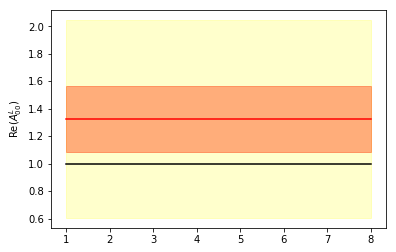

Order : 13
Im($A_{00}^L$)
[1. 0. 0.]
[0.56899637 0.         0.        ]


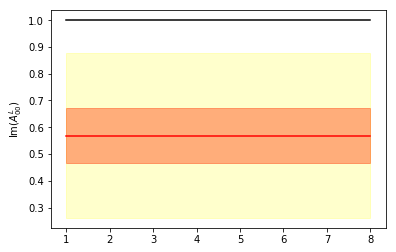

Order : 14
Re($A_{00}^R$)
[1. 0. 0.]
[2.5165129 0.        0.       ]


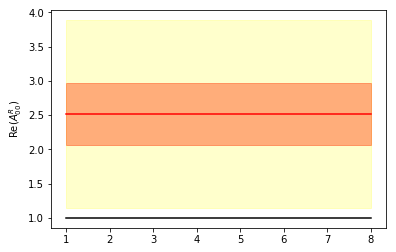

Order : 15
Im($A_{00}^R$)
[1. 0. 0.]
[1.1068023 0.        0.       ]


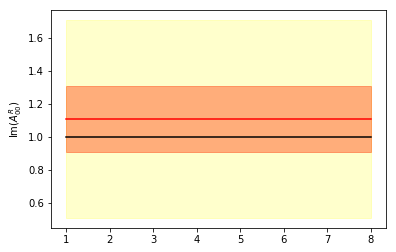

In [10]:
OrderI=np.arange(16)
OrderII=np.array([0, 5, 2, 1, 4, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
Pseudo=np.array([1 , -1 , 1 , -1 , 1 , -1 , 1, 1, 1 , 1 , 1 , 1 ,1 ,1 ,1 ,1])



# aproximate degeneracies in A_para_l & (- A_perp_l) ,  A_perp_l & (- A_para_l/2) ,  A_para_r & (- A_perp_r)
# corresponds to 


DEGENERACIES_IDX=[[0,4], [1 , 5],  [2,6], [3,7] , [4,0] , [5,1]]
Epsilon=[[1 , -1],[1 , -1], [1 , -1] , [1, -1] , [1 , -0.5],[1 , -0.5]]

x=np.linspace(1,8,50)

names=amplitude_latex_names

#print( toy_signalSM.coeffs[0] , toy_signalSM.coeffs[1] , toy_signalSM.coeffs[2])
#print( np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]))
#print(X)


Average=[]
StandarD=[]
for i in range(48):
    Average.append(np.mean(X[:,i]))
    StandarD.append(np.std(X[:,i]))

AV=np.reshape(Average,(16,3))
STD=np.reshape(StandarD,(16,3))

def ansatz(alpha, beta, gamma, q2):
    return alpha + beta*q2 + gamma/q2

def error1(sig_alpha, sig_beta, sig_gamma, q2):
    return np.sqrt(sig_alpha**2 + sig_beta**2*q2**2 + sig_beta**2/(q2**2))

def error2(alpha, beta, gamma, sig_alpha, sig_beta, sig_gamma, q2):
    sigA=(sig_alpha/alpha)**2
    sigB=(sig_beta/beta)**2
    sigC=(sig_gamma/gamma)**2
    return ansatz(alpha, beta, gamma, q2)*np.sqrt(sigA+sigB+sigC)
    
ID=np.reshape(toy_signalSM.coeffs,(16,3))



for I in range(16):
    print('Order :', I)
    param=Pseudo[I]*AV[int(OrderII[I])]
    err=Pseudo[I]*STD[int(OrderII[I]),:]
    ex=ID[I,:]
    print(names[I])
    print(ex)
    print(param)
    plt.plot(x , ansatz(ex[0] , ex[1] , ex[2] , x) , 'k')

    plt.fill_between(x , ansatz(param[0] , param[1] , param[2] , x) - error1(err[0],err[1],err[2], x) , 
                     ansatz(param[0] , param[1] , param[2] , x) + error1(err[0],err[1],err[2], x)  , alpha=0.4 , color='red')
    plt.fill_between(x , ansatz(param[0] , param[1] , param[2] , x) - 3*error1(err[0],err[1],err[2], x) , 
                     ansatz(param[0] , param[1] , param[2] , x) + 3*error1(err[0],err[1],err[2], x)  , alpha=0.2 , color='yellow')

    #plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x)) 
    plt.plot(x , ansatz(param[0] , param[1] , param[2] , x), 'r')
    plt.ylabel(amplitude_latex_names[I])
    plt.show()
#plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) + error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
Re($A_{\parallel}^L$)
Re($A_{\bot}^L$)
[-5.1563387  -0.20051515  8.024767  ]
[ 2.8286176  0.464156  -7.7249565]


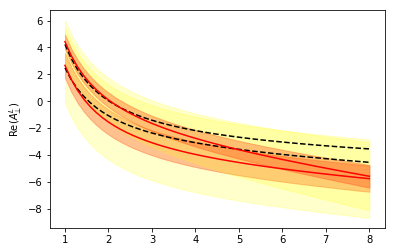

Im($A_{\parallel}^L$)
Im($A_{\bot}^L$)
[ 2.5372548 -0.4754293 -1.6236513]
[ 4.631073   -0.49472553 -6.5186996 ]


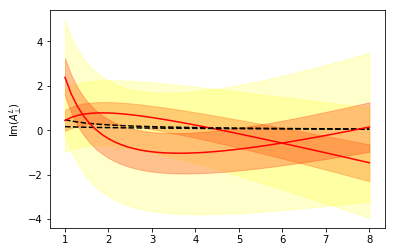

Re($A_{\parallel}^R$)
Re($A_{\bot}^R$)
[-0.4845395  -0.23006642 12.677174  ]
[ -0.09061537  -0.12294146 -10.235842  ]


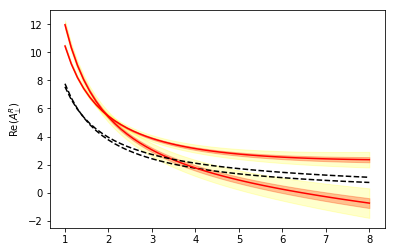

Im($A_{\parallel}^R$)
Im($A_{\bot}^R$)
[-0.02972944  0.02907241 -1.434439  ]
[0. 0. 0.]


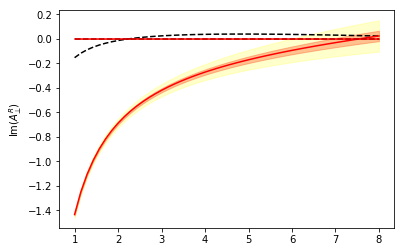

Re($A_{\bot}^L$)
Re($A_{\parallel}^L$)
[ 2.8286176  0.464156  -7.7249565]
[-5.1563387  -0.20051515  8.024767  ]


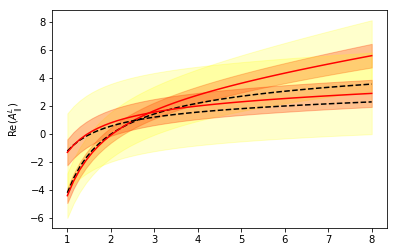

Im($A_{\bot}^L$)
Im($A_{\parallel}^L$)
[ 4.631073   -0.49472553 -6.5186996 ]
[ 2.5372548 -0.4754293 -1.6236513]


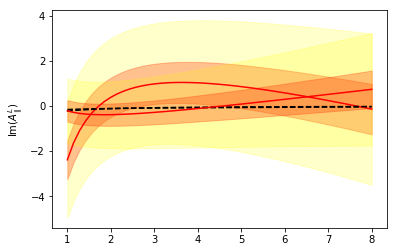

In [11]:
#Want to check for degeneracies 



print(fix_array)

for J in range(len(DEGENERACIES_IDX)):
    
    
    id1=DEGENERACIES_IDX[J][0]
    param1=Pseudo[id1]*AV[int(OrderII[id1]),:]
    err1=Pseudo[id1]*STD[int(OrderII[id1]),:]
    ex1=ID[id1,:]

    id2=DEGENERACIES_IDX[J][1]
    param2=Pseudo[id2]*AV[int(OrderII[id2]),:]
    err2=Pseudo[id2]*STD[int(OrderII[id2]),:]
    ex2=ID[id2,:]

    print(names[id1])
    print(names[id2])
    PARAM=[param1 , param2]
    ERR=[err1 , err2]
    EX=[ex1,ex2]
    compare=[id1 , id2]


    for j in range(len(compare)):

        id1=compare[j]
        ex1=EX[j]
        param1=PARAM[j]
        print(param1)
        err1=ERR[j]
        fac=Epsilon[J][j]

        plt.plot(x , fac*ansatz(ex1[0] , ex1[1] , ex1[2] , x) , 'k--')
        
        dy=error1(err1[0],err1[1],err1[2], x)
        #dy=error2(param1[0] , param1[1] , param1[2] ,err1[0],err1[1],err1[2], x)
        plt.fill_between(x , fac*ansatz(param1[0] , param1[1] , param1[2] , x) - dy , 
                         fac*ansatz(param1[0] , param1[1] , param1[2] , x) + dy  , alpha=0.3 , color='red')
        plt.fill_between(x , fac*ansatz(param1[0] , param1[1] , param1[2] , x) - 3*dy , 
                         fac*ansatz(param1[0] , param1[1] , param1[2] , x) + 3*dy  , alpha=0.2 , color='yellow')

        #plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x)) 
        plt.plot(x , fac*ansatz(param1[0] , param1[1] , param1[2] , x), 'r')
        plt.ylabel(amplitude_latex_names[id1])
    plt.show()


# Using the various data.csv files .. 


In [14]:
import pandas as pd

signal_coeffs = bmf.coeffs.signal(bmf.coeffs.SM)
Coef0=[i.numpy() for i in signal_coeffs] 
print(Coef0)


dataM = pd.read_csv("/home/pierre-edouard/Desktop/ICL/Git_LHCb/Minuit/Test_stats/data_new.csv")
dataM = dataM.values



[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]


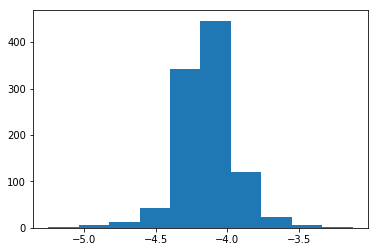

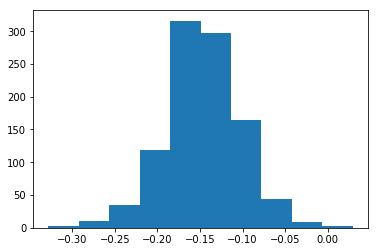

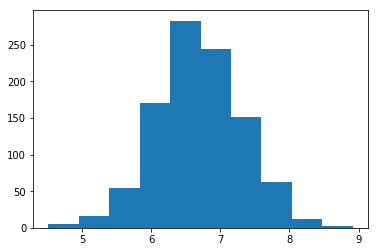

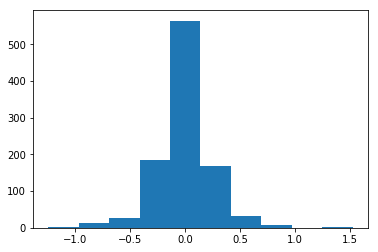

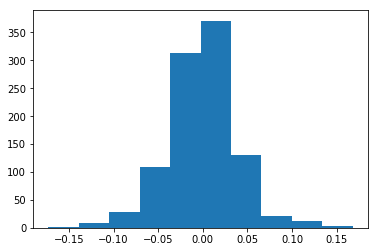

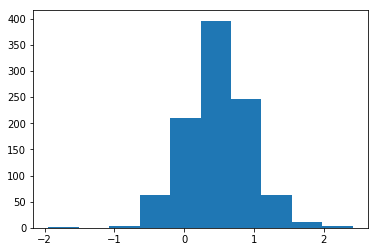

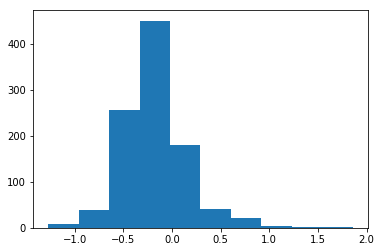

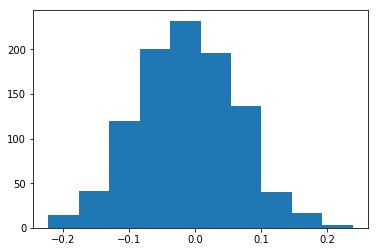

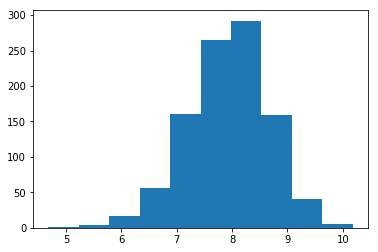

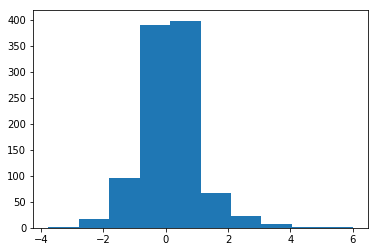

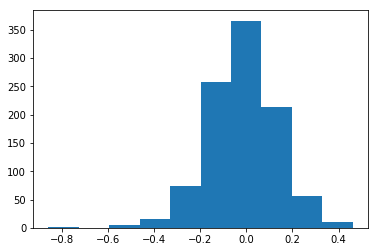

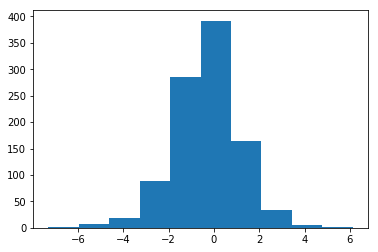

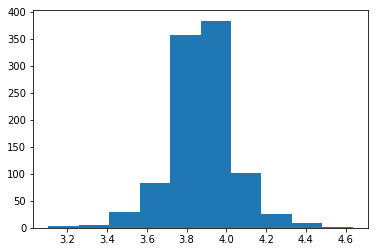

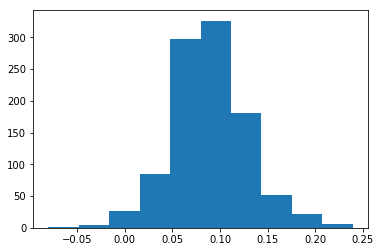

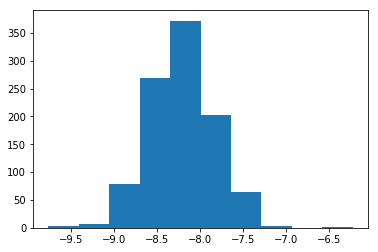

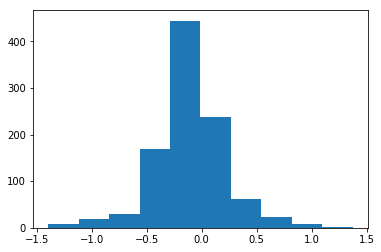

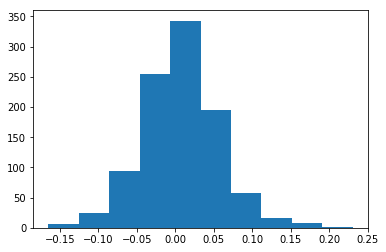

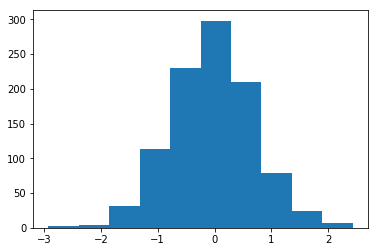

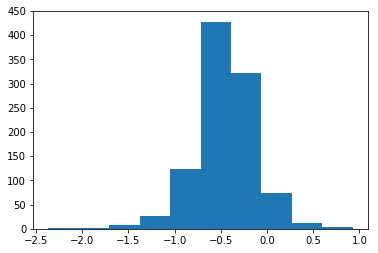

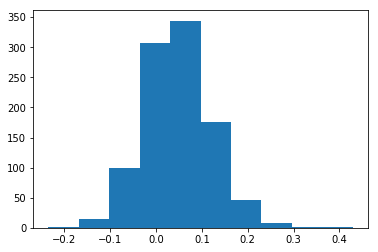

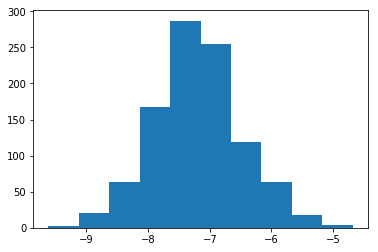

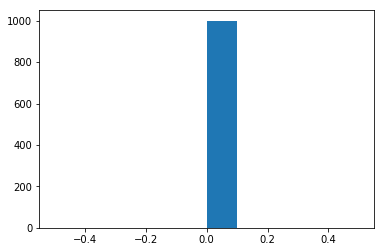

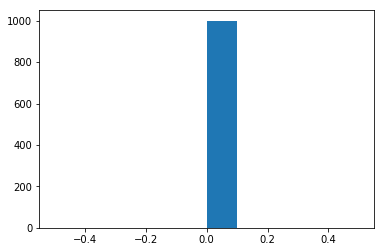

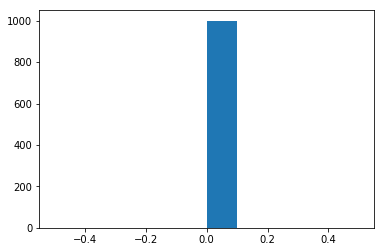

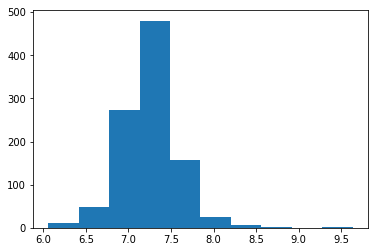

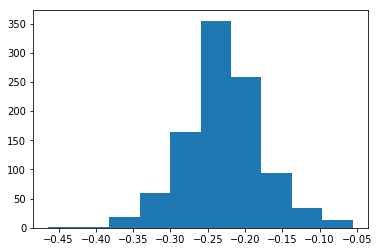

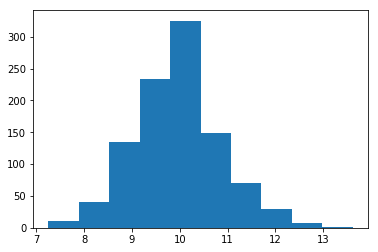

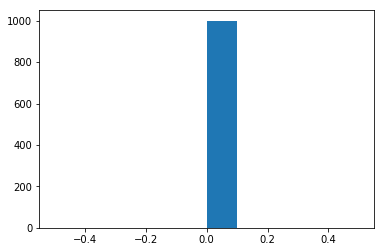

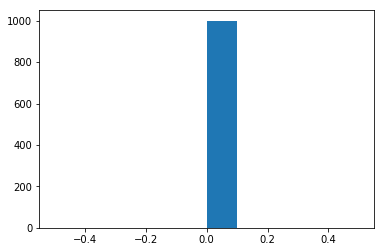

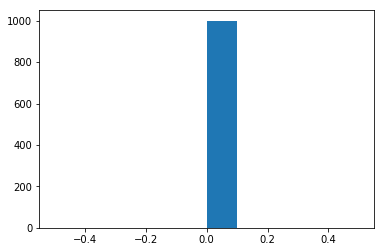

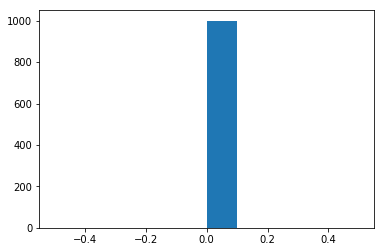

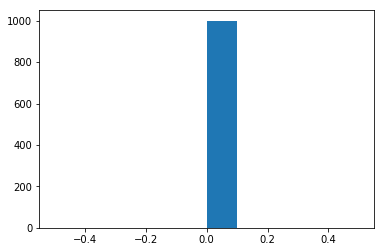

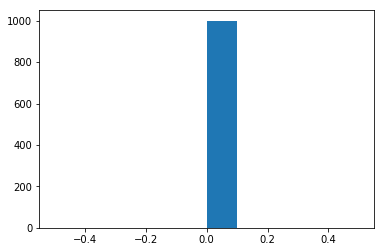

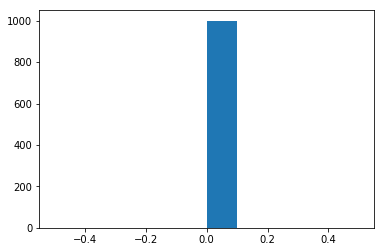

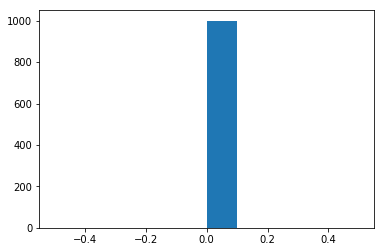

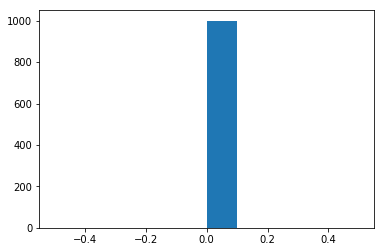

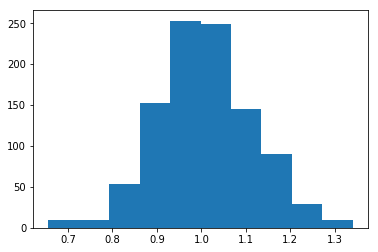

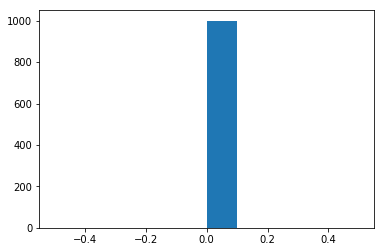

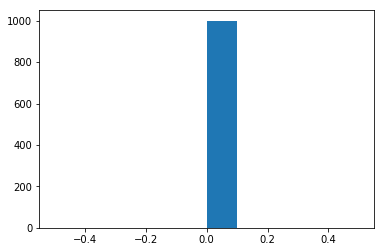

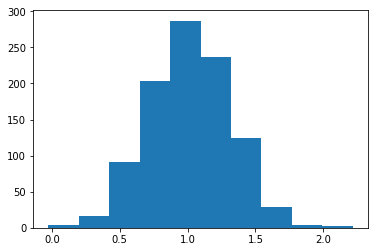

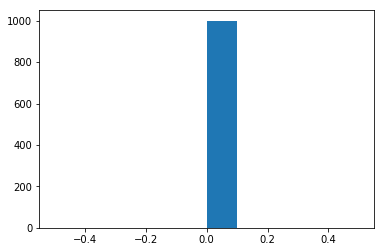

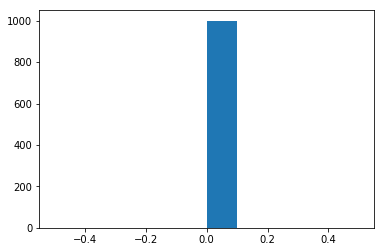

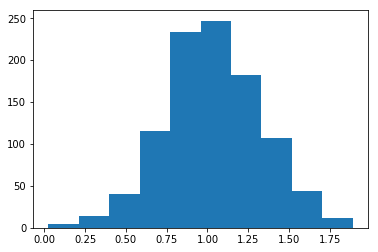

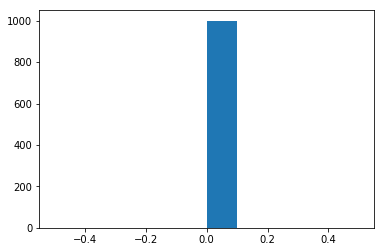

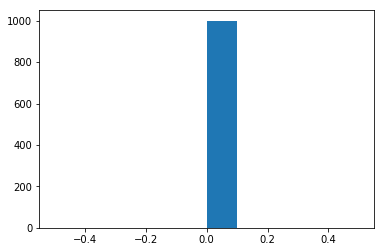

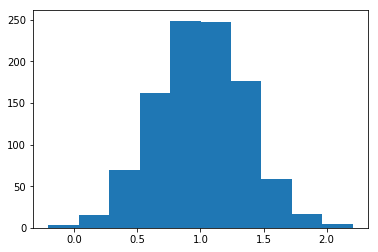

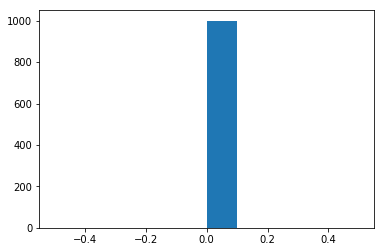

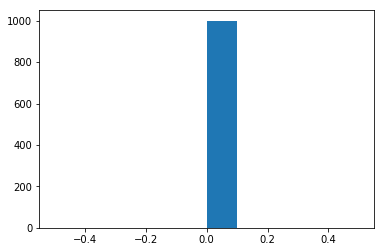

In [15]:
N=1000
coefs , errs = get_arrays(dataM , N)
for J in range(48):
    plt.hist(coefs[:,J])
    plt.show()
    

# Using Lejambon error method 

48
[[-3.85794414 -0.20153721  7.32781627 ...  0.91730195  0.
   0.        ]
 [-3.94257163 -0.21261111  5.9797473  ...  1.71674782  0.
   0.        ]
 [-3.87067823 -0.19294941  5.7632531  ...  0.39284982  0.
   0.        ]
 ...
 [-3.99364661 -0.22340426  6.90875387 ...  1.4081038   0.
   0.        ]
 [-4.17917537 -0.21639387  7.3865524  ...  1.2380395   0.
   0.        ]
 [-4.02857435 -0.12640249  5.30045158 ...  1.00318422  0.
   0.        ]]


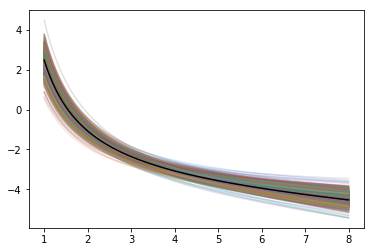

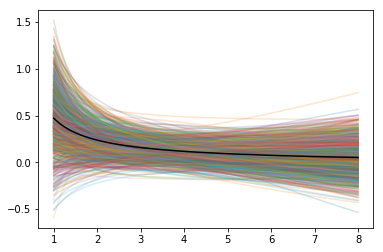

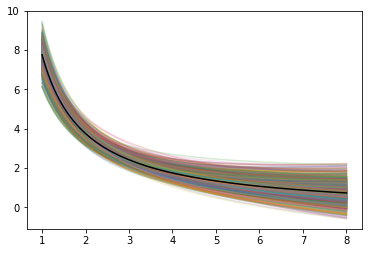

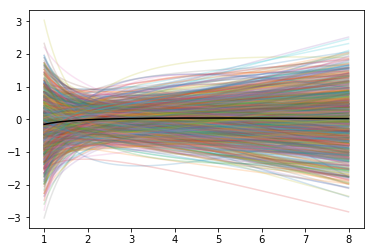

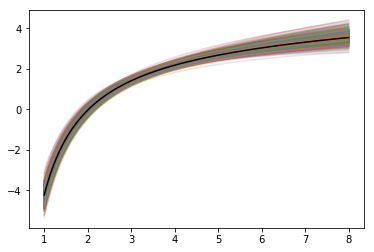

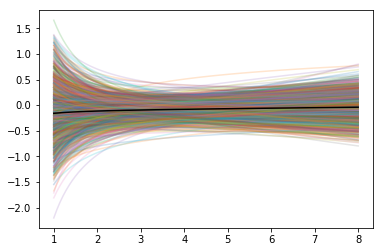

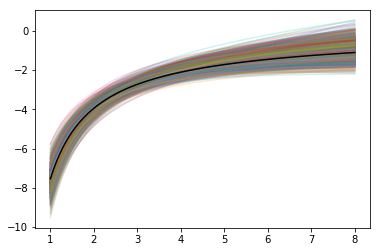

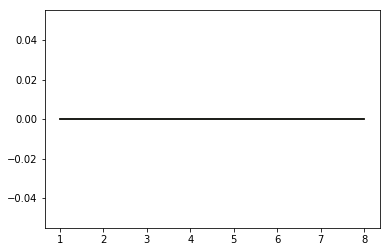

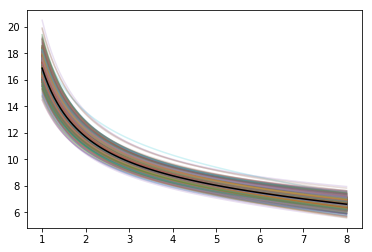

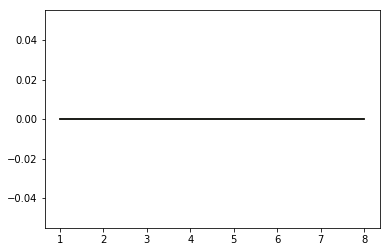

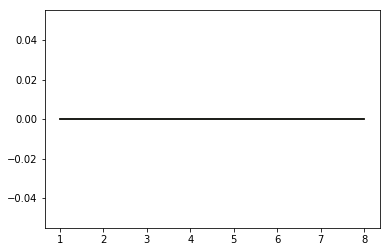

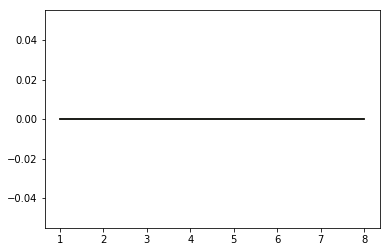

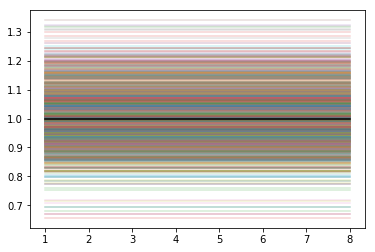

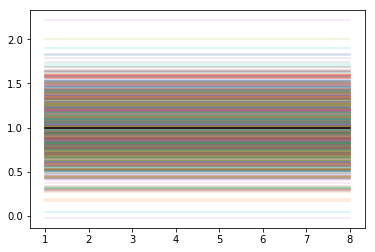

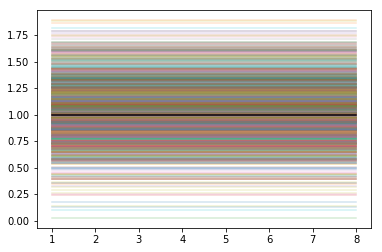

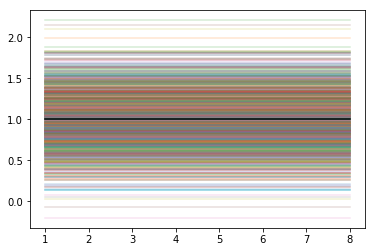

In [17]:
'''

mean=np.reshape(np.mean(X , axis=0),(16,3))
data=[]
for j in range(len(X[:,0])):   
    data.append(ansatz(X[j,0],X[j,1],X[j,2],x))
    plt.plot(x , data[j] , 'yellow')
idx=0
#print(mean)



#print(AV)
data=np.asarray(data)

'''
q2_range=np.linspace(bmf.signal.q2_min, bmf.signal.q2_max, 100)
x=np.linspace(1,8,100)
max_68=[]
max_95=[]
min_68=[]
min_95=[]

data=coefs

AV=np.mean(data , axis=0)
print(len(AV))
min_68, max_68, min_95, max_95 = ([] for i in range(4))
print(data)


for k in range(0,48,3):
    for j in range(len(data[:,0])):
        plt.plot(x , ansatz(data[j,k] ,data[j,k+1] ,data[j,k+2] , x) , alpha=0.2)
    plt.plot(x ,ansatz(Coef0[k] ,Coef0[k+1] ,Coef0[k+2] , x) , 'k' )
    plt.show()

In [18]:

above_mean=sorted(j for j in data[:,0] if j > AV[0])
#print(above_mean)
for i, q2 in enumerate(q2_range-1):
    print(i , q2)
    #print(sorted(data[:,i]))
    #print(AV[i])
    lim=AV[i]
    dattt=[]

    above_mean=sorted(j for j in data[:,i] if j > lim )
    below_mean=sorted(j for j in data[:,i] if j < lim ) 
    
    below_mean=sorted(below_mean, reverse=True)
    
    #print(len(above_mean))
    
    max_68.append(above_mean[int((len(above_mean) - 1) * 0.68)])
    max_95.append(above_mean[int((len(above_mean) - 1) * 0.95)])
    
    min_68.append(below_mean[int((len(below_mean) - 1) * 0.68)])
    min_95.append(below_mean[int((len(below_mean) - 1) * 0.95)])
    
    '''
    print(AV[i])
    print(above_mean )
    print(below_mean, '\n')
    #sorted(i for i in j if i >= ansatz(mean[]))
    '''
    
plt.plot(x , max_68)
plt.plot(x , min_68)
plt.plot(x , max_95)
plt.plot(x , min_95)
plt.show()





0 0.0
1 0.07070707070707072
2 0.14141414141414144
3 0.21212121212121215
4 0.2828282828282829
5 0.3535353535353536
6 0.4242424242424243
7 0.4949494949494948
8 0.5656565656565657
9 0.6363636363636362
10 0.7070707070707072
11 0.7777777777777777
12 0.8484848484848484
13 0.9191919191919191
14 0.9898989898989898
15 1.0606060606060606
16 1.1313131313131315
17 1.202020202020202
18 1.2727272727272725
19 1.3434343434343434
20 1.4141414141414144
21 1.4848484848484849


IndexError: list index out of range

[[-3.85794414 -0.20153721  7.32781627]
 [-3.94257163 -0.21261111  5.9797473 ]
 [-3.87067823 -0.19294941  5.7632531 ]
 ...
 [-3.99364661 -0.22340426  6.90875387]
 [-4.17917537 -0.21639387  7.3865524 ]
 [-4.02857435 -0.12640249  5.30045158]]
(1000, 3)
20


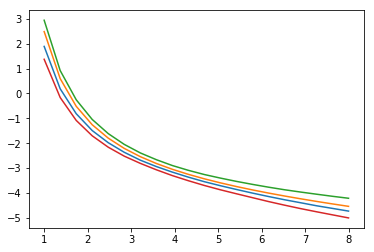

In [20]:
dataA=data[:,0:3]
print(dataA)
print(dataA.shape)



x=np.linspace(1,8,20)

def get_68(dataA,x):
    
    mean=np.mean(dataA , axis=0)
    #print(mean)
    min_68=[]
    max_68=[]
    for I in range(len(x)):
        #print(i , q2)
        #print(sor)ted(data[:,i]))
        
        distrib=[]
        for k in range(len(dataA[:,0])):

            distrib.append(ansatz(dataA[k,0],dataA[k,1],dataA[k,2],x[I]))
        
        lim=np.mean(distrib)#print(distrib)
        
        #print(distrib)
        #print(distrib)
        #print(lim)
        above_mean=sorted(j for j in distrib if j > lim )
        below_mean=sorted(j for j in distrib if j < lim ) 

        below_mean=sorted(below_mean, reverse=True)

        #print(len(below_mean))

        max_68.append(above_mean[int((len(above_mean) - 1) * 0.68)])

        min_68.append(below_mean[int((len(below_mean) - 1) * 0.68)])
        
    return min_68 , max_68


def get_95(dataA,x):
    
    mean=np.mean(dataA , axis=0)
    #print(mean)
    min_95=[]
    max_95=[]
    for I in range(len(x)):
        #print(i , q2)
        #print(sor)ted(data[:,i]))
        
        distrib=[]
        for k in range(len(dataA[:,0])):

            distrib.append(ansatz(dataA[k,0],dataA[k,1],dataA[k,2],x[I]))
        
        lim=np.mean(distrib)#print(distrib)
        
        #print(distrib)
        #print(distrib)
        #print(lim)
        above_mean=sorted(j for j in distrib if j > lim )
        below_mean=sorted(j for j in distrib if j < lim ) 

        below_mean=sorted(below_mean, reverse=True)

        #print(len(below_mean))

        max_95.append(above_mean[int((len(above_mean) - 1) * 0.95)])

        min_95.append(below_mean[int((len(below_mean) - 1) * 0.95)])
        
    return min_95 , max_95




minn, maxx =get_68(dataA ,x)
minnI, maxxI =get_95(dataA ,x)
print(len(minn))
plt.plot(x , minn)
plt.plot(x , ansatz(Coef0[0], Coef0[1] , Coef0[2] , x))
plt.plot(x , maxx)
plt.plot(x , minnI)

(1000, 48)



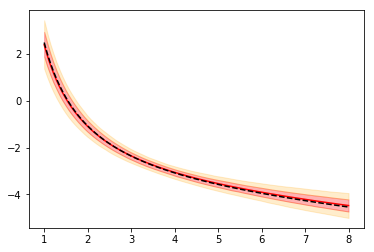

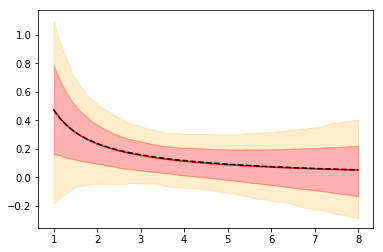

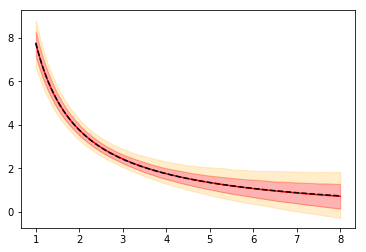

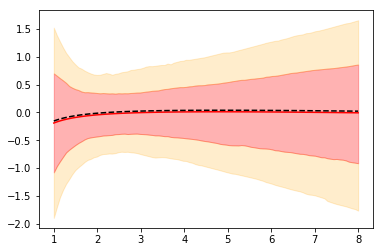

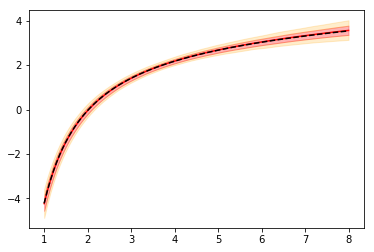

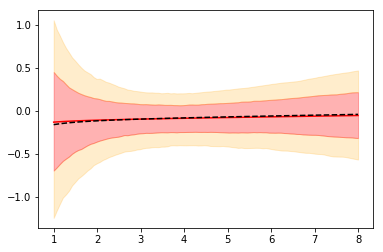

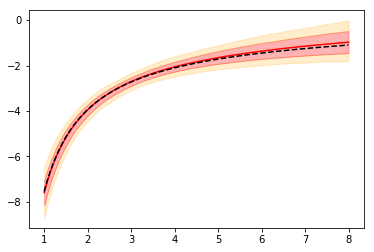

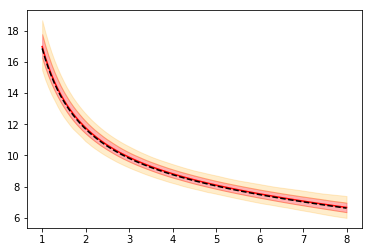

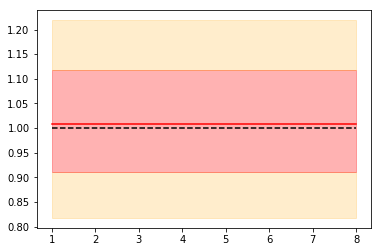

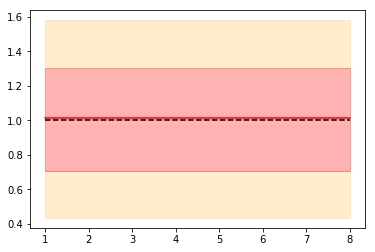

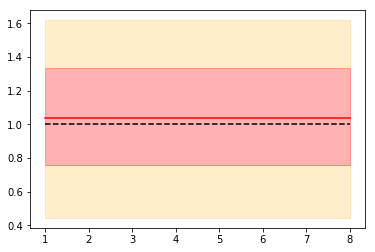

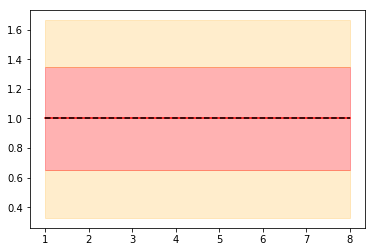

In [38]:
data=coefs

print(data.shape)
print()

for j in range(0,48,3):
    if fix_array[j]==0:
        
        q2_range=np.linspace(bmf.signal.q2_min, bmf.signal.q2_max, 100)
        x=np.linspace(1,8,100)
        max_68=[]
        max_95=[]
        #print(feed[:,0])
        dattt=data[:,j:j+3]
        
        mean=np.mean(dattt , axis=0)
        min68 , max68= get_68(dattt ,x)
        min95 , max95= get_95(dattt ,x)

        #plt.plot(x,min68 , 'r' , alpha =0.3)
        #plt.plot(x,max68 , 'r' , alpha =0.3)
        #plt.plot(x,min95 , 'r' , alpha =0.3)
        #plt.plot(x,max95 , 'r' , alpha =0.3)
        
        plt.plot(x, ansatz(mean[0],mean[1],mean[2],x) , 'r')
        plt.plot(x, ansatz(Coef0[j],Coef0[j+1],Coef0[j+2],x) , 'k--')
        plt.fill_between(x , min95 , min68 , color='orange' , alpha=0.2)
        plt.fill_between(x , min68 , max68 , color='red' , alpha=0.3)
        plt.fill_between(x , max68 , max95 , color='orange' , alpha=0.2)
        plt.show()
    

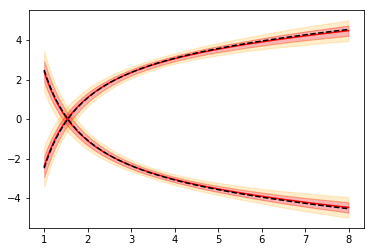

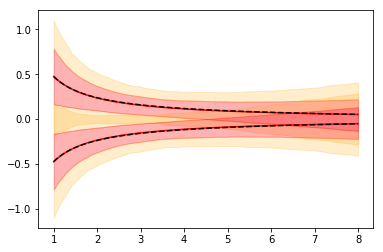

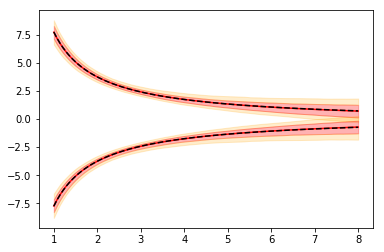

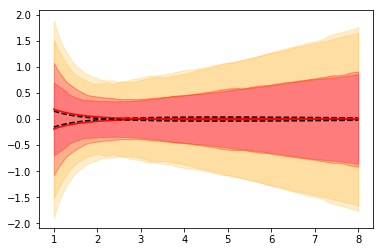

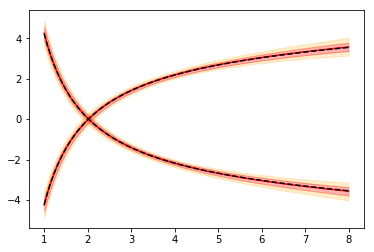

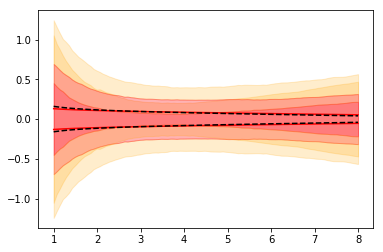

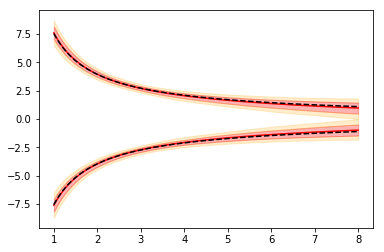

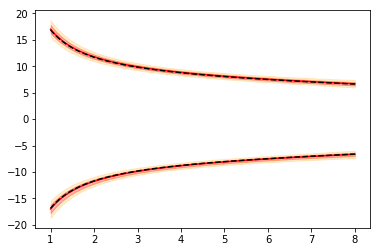

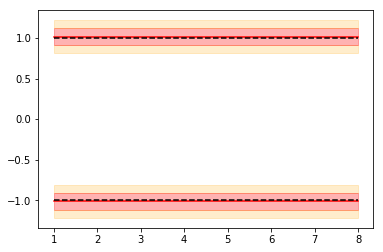

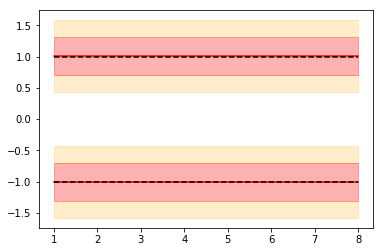

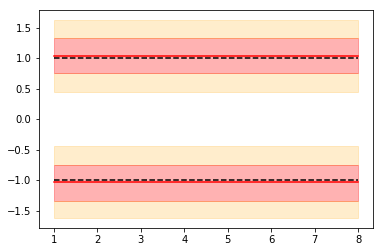

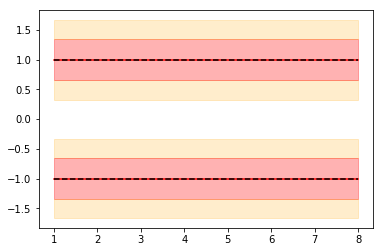

In [41]:
# discrete symmetries ?  

    
for j in range(0,48,3):
    if fix_array[j]==0:
        q2_range=np.linspace(bmf.signal.q2_min, bmf.signal.q2_max, 100)
        x=np.linspace(1,8,100)
        max_68=[]
        max_95=[]
        #print(feed[:,0])
        dattt=data[:,j:j+3]
        
        mean=np.mean(dattt , axis=0)
        min68 , max68= get_68(dattt ,x)
        min95 , max95= get_95(dattt ,x)

        #plt.plot(x,min68 , 'r' , alpha =0.3)
        #plt.plot(x,max68 , 'r' , alpha =0.3)
        #plt.plot(x,min95 , 'r' , alpha =0.3)
        #plt.plot(x,max95 , 'r' , alpha =0.3)
        
        plt.plot(x, ansatz(mean[0],mean[1],mean[2],x) , 'r')
        plt.plot(x, ansatz(Coef0[j],Coef0[j+1],Coef0[j+2],x) , 'k--')
        plt.fill_between(x , min95 , min68 , color='orange' , alpha=0.2)
        plt.fill_between(x , min68 , max68 , color='red' , alpha=0.3)
        plt.fill_between(x , max68 , max95 , color='orange' , alpha=0.2)
        
        

        down68 = [-x for x in min68]
        up68 = [ -x for x in max68]
        down95 = [ -x for x in min95]
        up95 = [ -x for x in max95]
        
        plt.plot(x, -ansatz(mean[0],mean[1],mean[2],x) , 'r')
        plt.plot(x, -ansatz(Coef0[j],Coef0[j+1],Coef0[j+2],x) , 'k--')
        plt.fill_between(x ,  down95 , down68 , color='orange' , alpha=0.2)
        plt.fill_between(x , down68 , up68 , color='red' , alpha=0.3)
        plt.fill_between(x , up68 , up95 , color='orange' , alpha=0.2)
           
        
        plt.show()

# TensorFlow amplitude fits now 

In [44]:
datatf = pd.read_csv("/home/pierre-edouard/Desktop/ICL/Git_LHCb/Minuit/Test_stats/tfpulls.csv")
datatf = datatf.values
print(datatf)

[[-5.64324864  0.21473567  0.03147287 ...  1.          0.
   1.        ]
 [-3.51327991  0.14058247 -0.28886554 ...  1.          0.
   1.        ]
 [-3.67374849  0.19629737 -0.24909805 ...  1.          0.
   1.        ]
 ...
 [-4.73806846  0.08385829 -0.10140135 ...  1.          0.
   1.        ]
 [-4.45997524  0.08095982 -0.22775786 ...  1.          0.
   1.        ]
 [-4.73248789  0.10724883 -0.13473486 ...  1.          0.
   1.        ]]


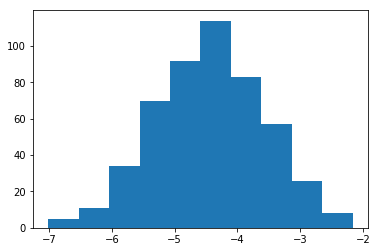

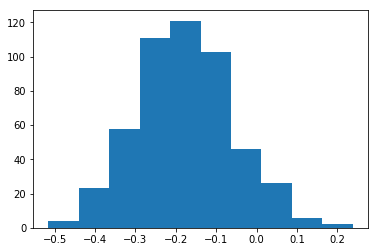

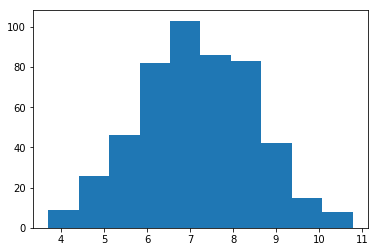

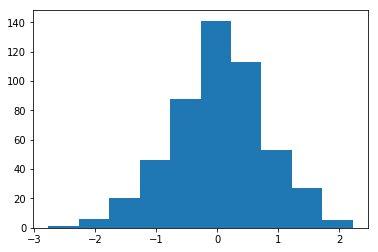

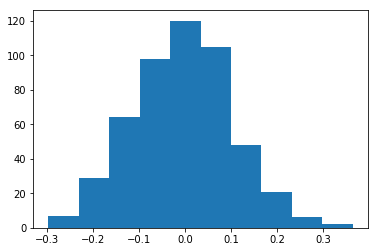

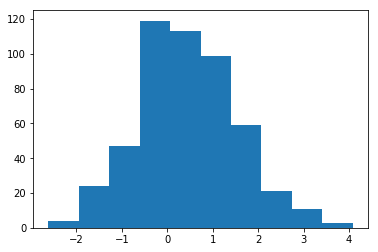

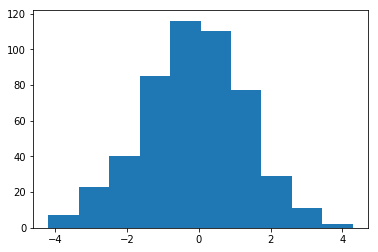

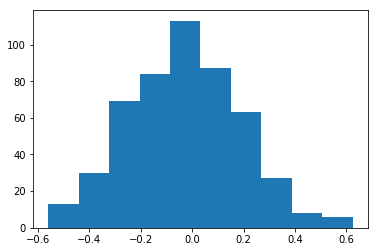

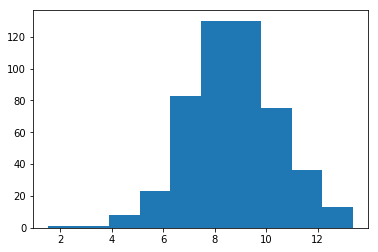

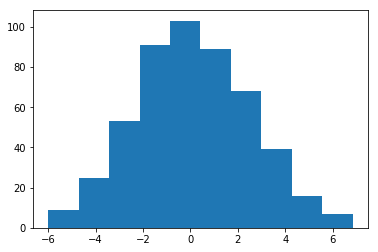

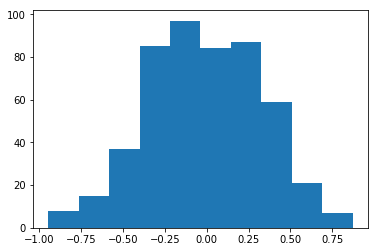

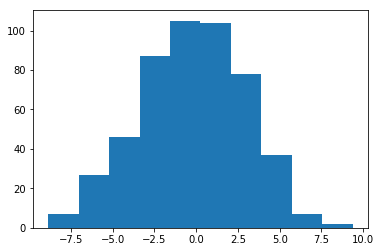

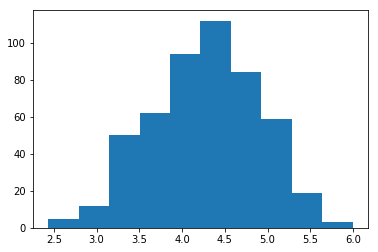

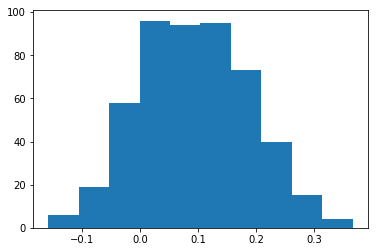

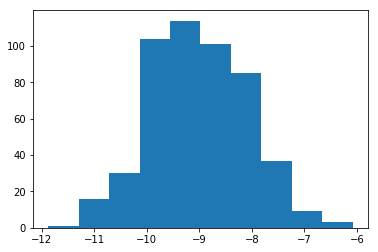

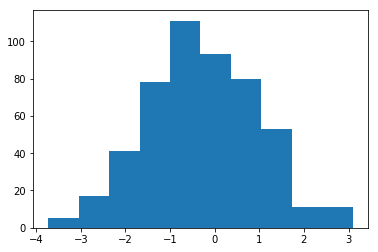

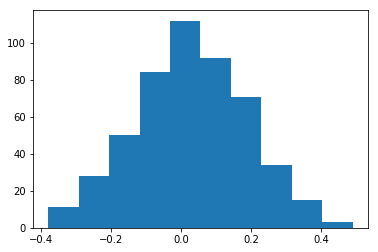

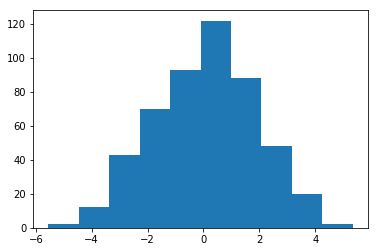

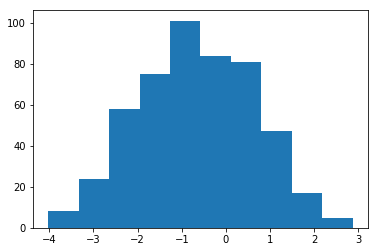

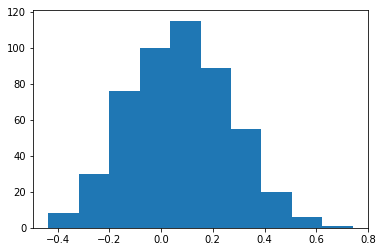

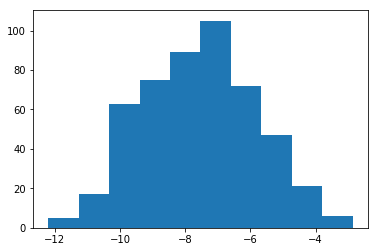

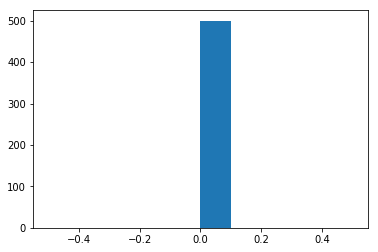

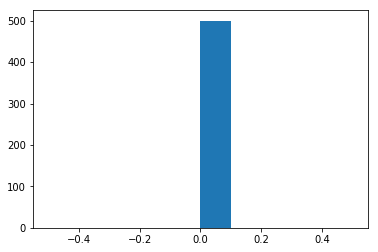

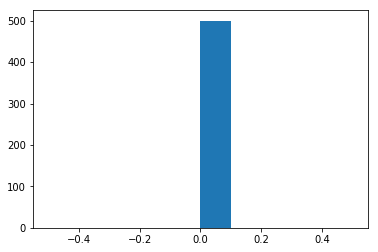

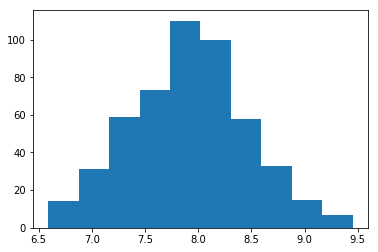

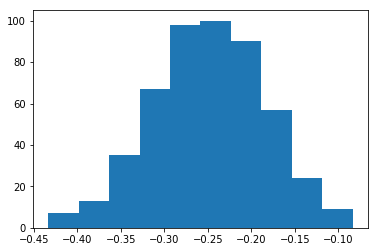

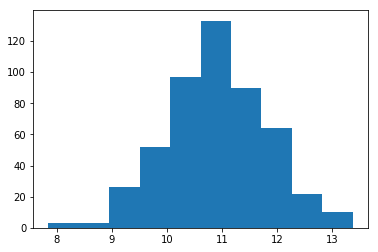

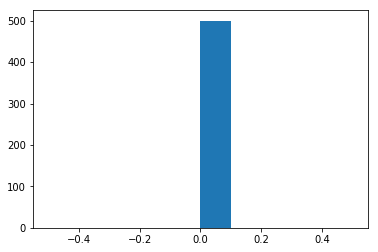

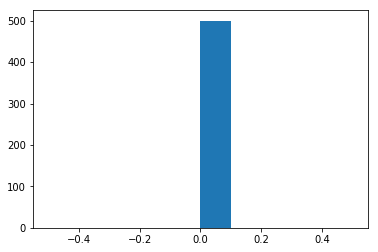

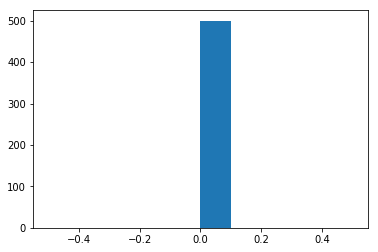

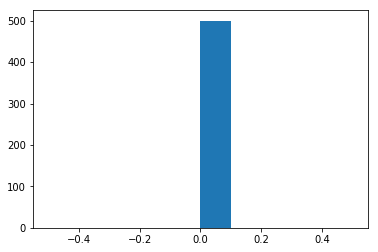

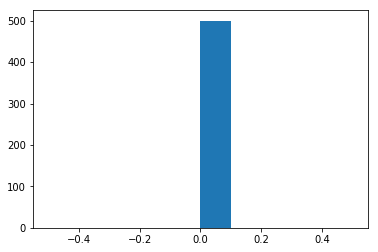

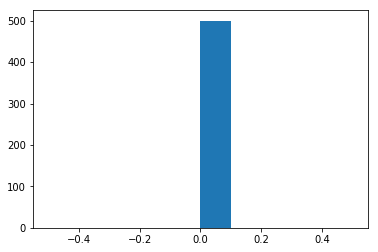

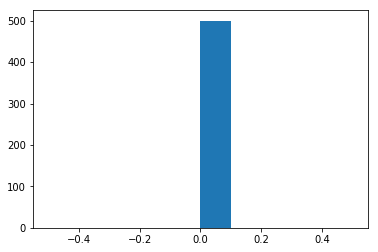

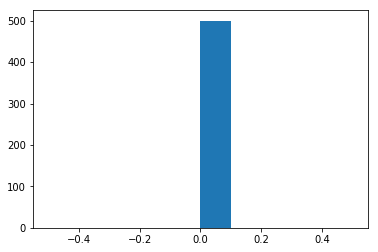

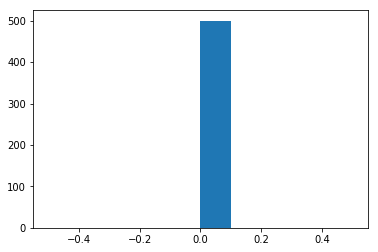

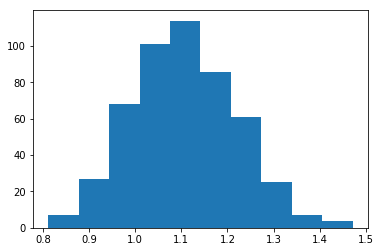

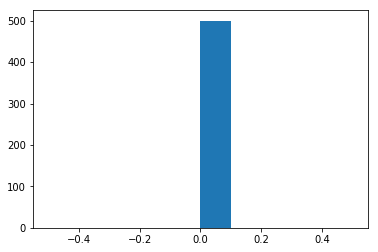

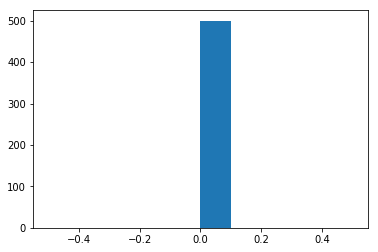

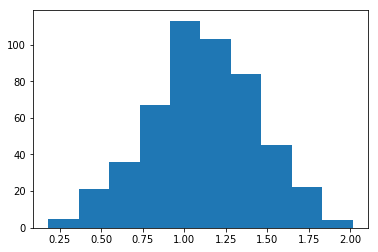

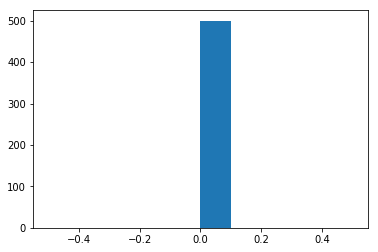

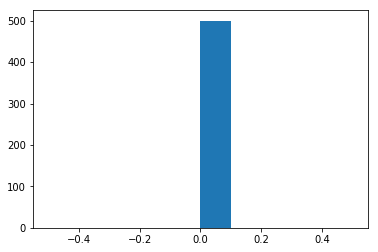

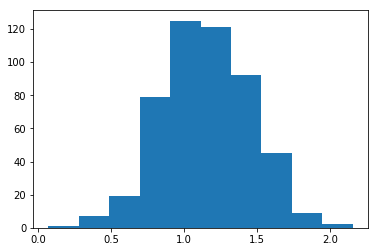

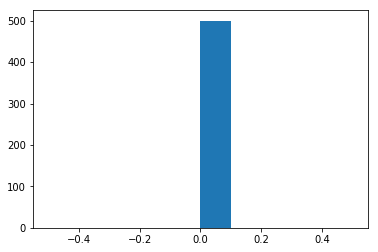

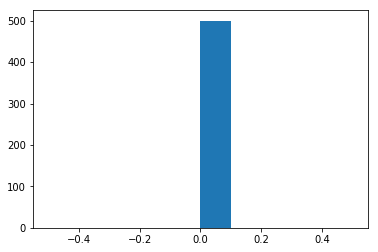

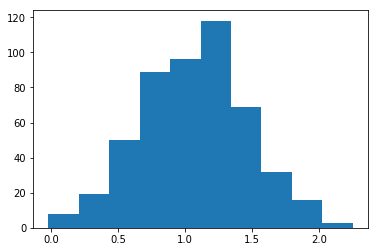

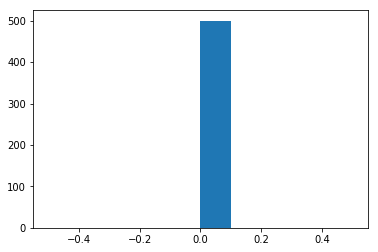

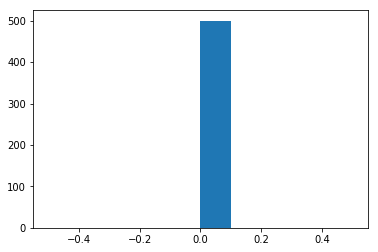

In [47]:
N=500
coefstf , errs = get_arrays(datatf , N)
for J in range(48):
    plt.hist(coefs[:,J])
    plt.show()

(500, 48)



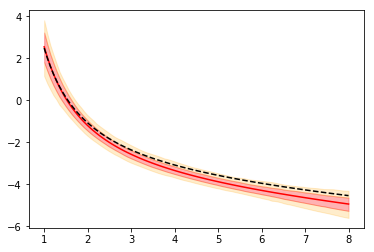

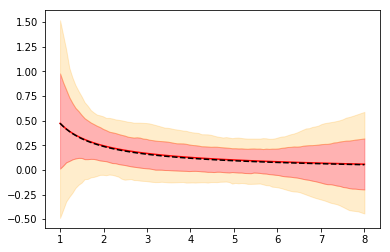

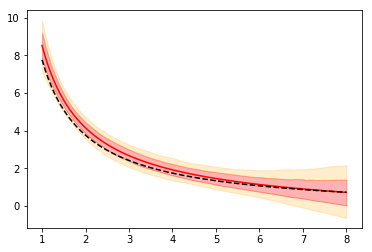

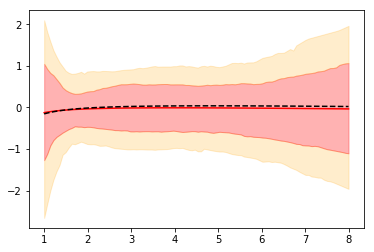

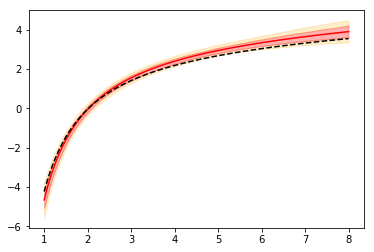

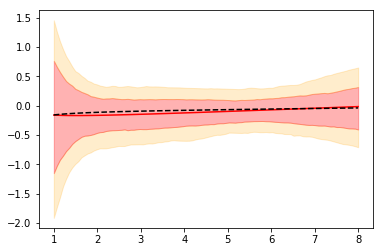

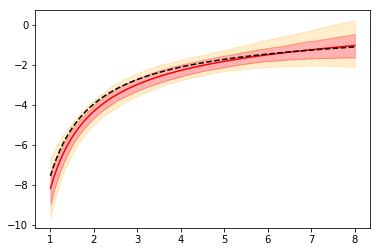

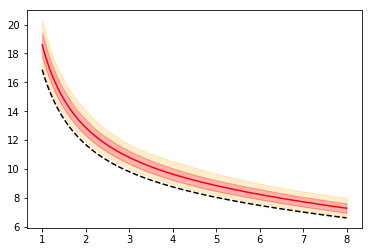

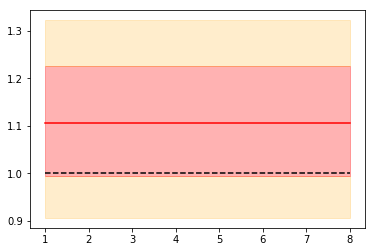

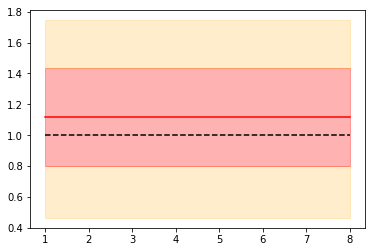

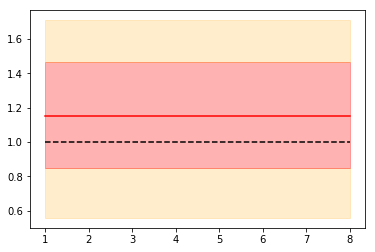

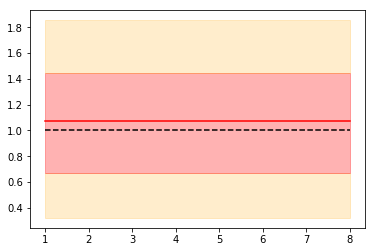

In [48]:
data=coefstf

print(data.shape)
print()

for j in range(0,48,3):
    if fix_array[j]==0:
        
        q2_range=np.linspace(bmf.signal.q2_min, bmf.signal.q2_max, 100)
        x=np.linspace(1,8,100)
        max_68=[]
        max_95=[]
        #print(feed[:,0])
        dattt=data[:,j:j+3]
        
        mean=np.mean(dattt , axis=0)
        min68 , max68= get_68(dattt ,x)
        min95 , max95= get_95(dattt ,x)

        #plt.plot(x,min68 , 'r' , alpha =0.3)
        #plt.plot(x,max68 , 'r' , alpha =0.3)
        #plt.plot(x,min95 , 'r' , alpha =0.3)
        #plt.plot(x,max95 , 'r' , alpha =0.3)
        
        plt.plot(x, ansatz(mean[0],mean[1],mean[2],x) , 'r')
        plt.plot(x, ansatz(Coef0[j],Coef0[j+1],Coef0[j+2],x) , 'k--')
        plt.fill_between(x , min95 , min68 , color='orange' , alpha=0.2)
        plt.fill_between(x , min68 , max68 , color='red' , alpha=0.3)
        plt.fill_between(x , max68 , max95 , color='orange' , alpha=0.2)
        plt.show()
   